In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from scipy.signal import find_peaks

In [2]:
df = pd.read_pickle("../data/Hate_Speech_merged.pkl")

In [216]:
idx_lst = []
major = ['KBS', 'MBC', 'SBS', 'YTN', '국민일보', '동아일보', '매일경제', '조선일보', '중앙일보', '한겨레', '한국경제', '한국일보']
for idx, i in enumerate(df['언론사']):
    if i in major:
        idx_lst.append(idx)

In [222]:
df = df.iloc[idx_lst].copy()
len(df)

39708

In [223]:
y = []
m = []
d = []
ym = []

for item in df['일자']:
    time = pd.to_datetime(str(item))
    y.append(time.year)
    m.append(time.month)
    d.append(time.day)
    ym.append(str(time.year) + '-' + str(time.month))


In [224]:
df['year'] = y
df['month'] = m
df['day'] = d
df['ym'] = ym


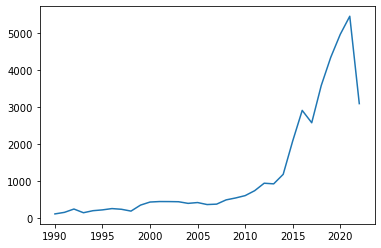

In [225]:
plt.plot(df.groupby('year').count()['일자'])

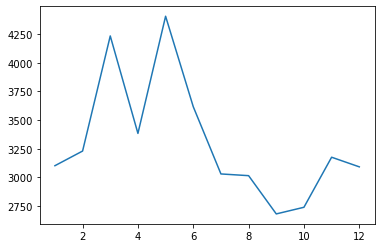

In [226]:
plt.plot(df.groupby('month').count()['일자'])

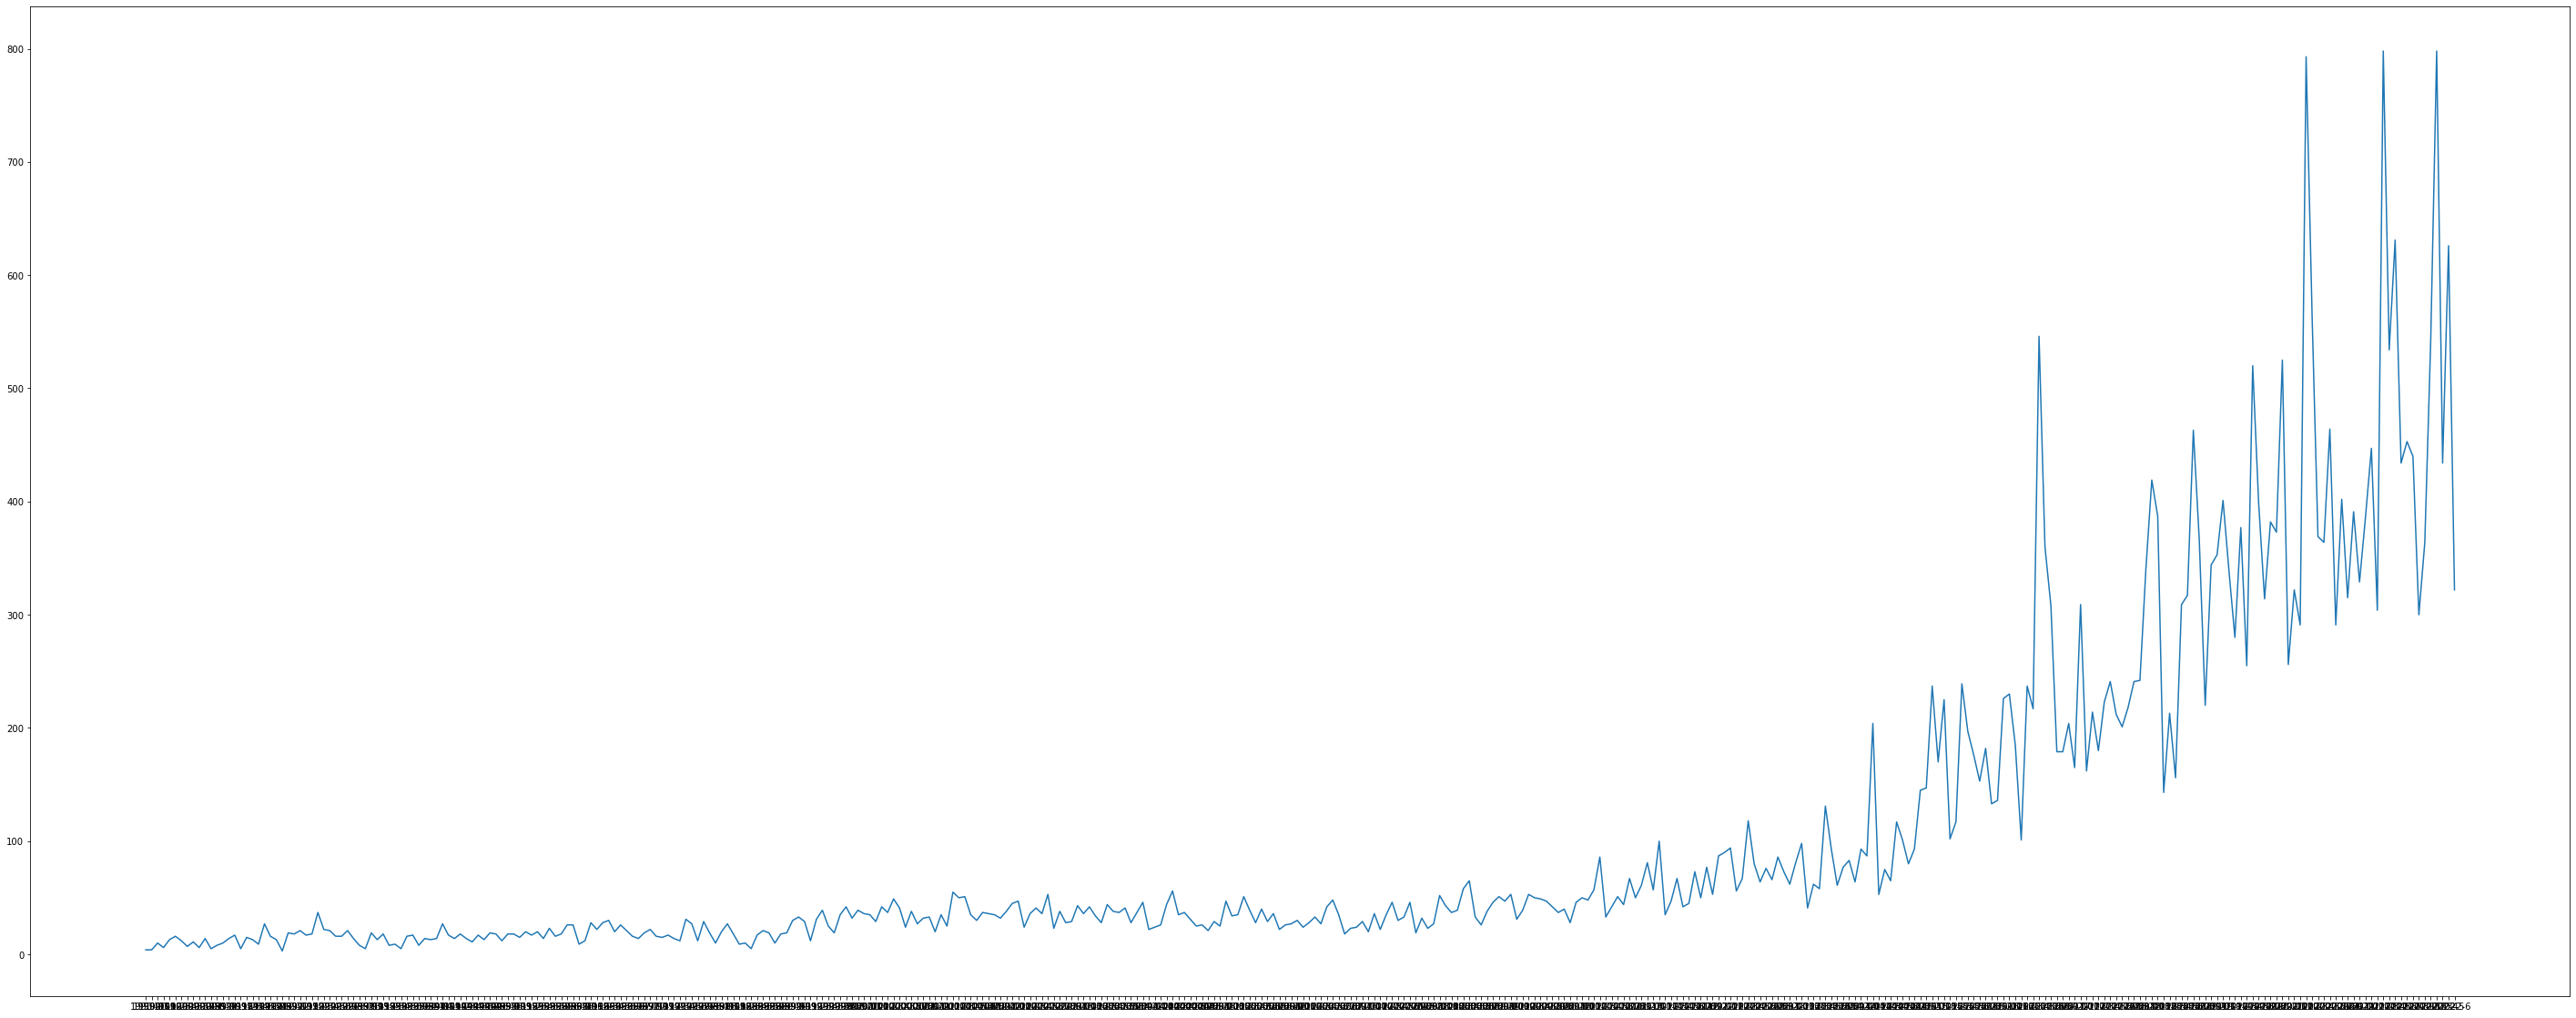

In [232]:
df_ym = df.groupby('ym').count()['일자']
plt.figure(figsize = (50, 20))
plt.plot(df_ym)

In [233]:
peaks, properties = find_peaks(df_ym, distance= 10)

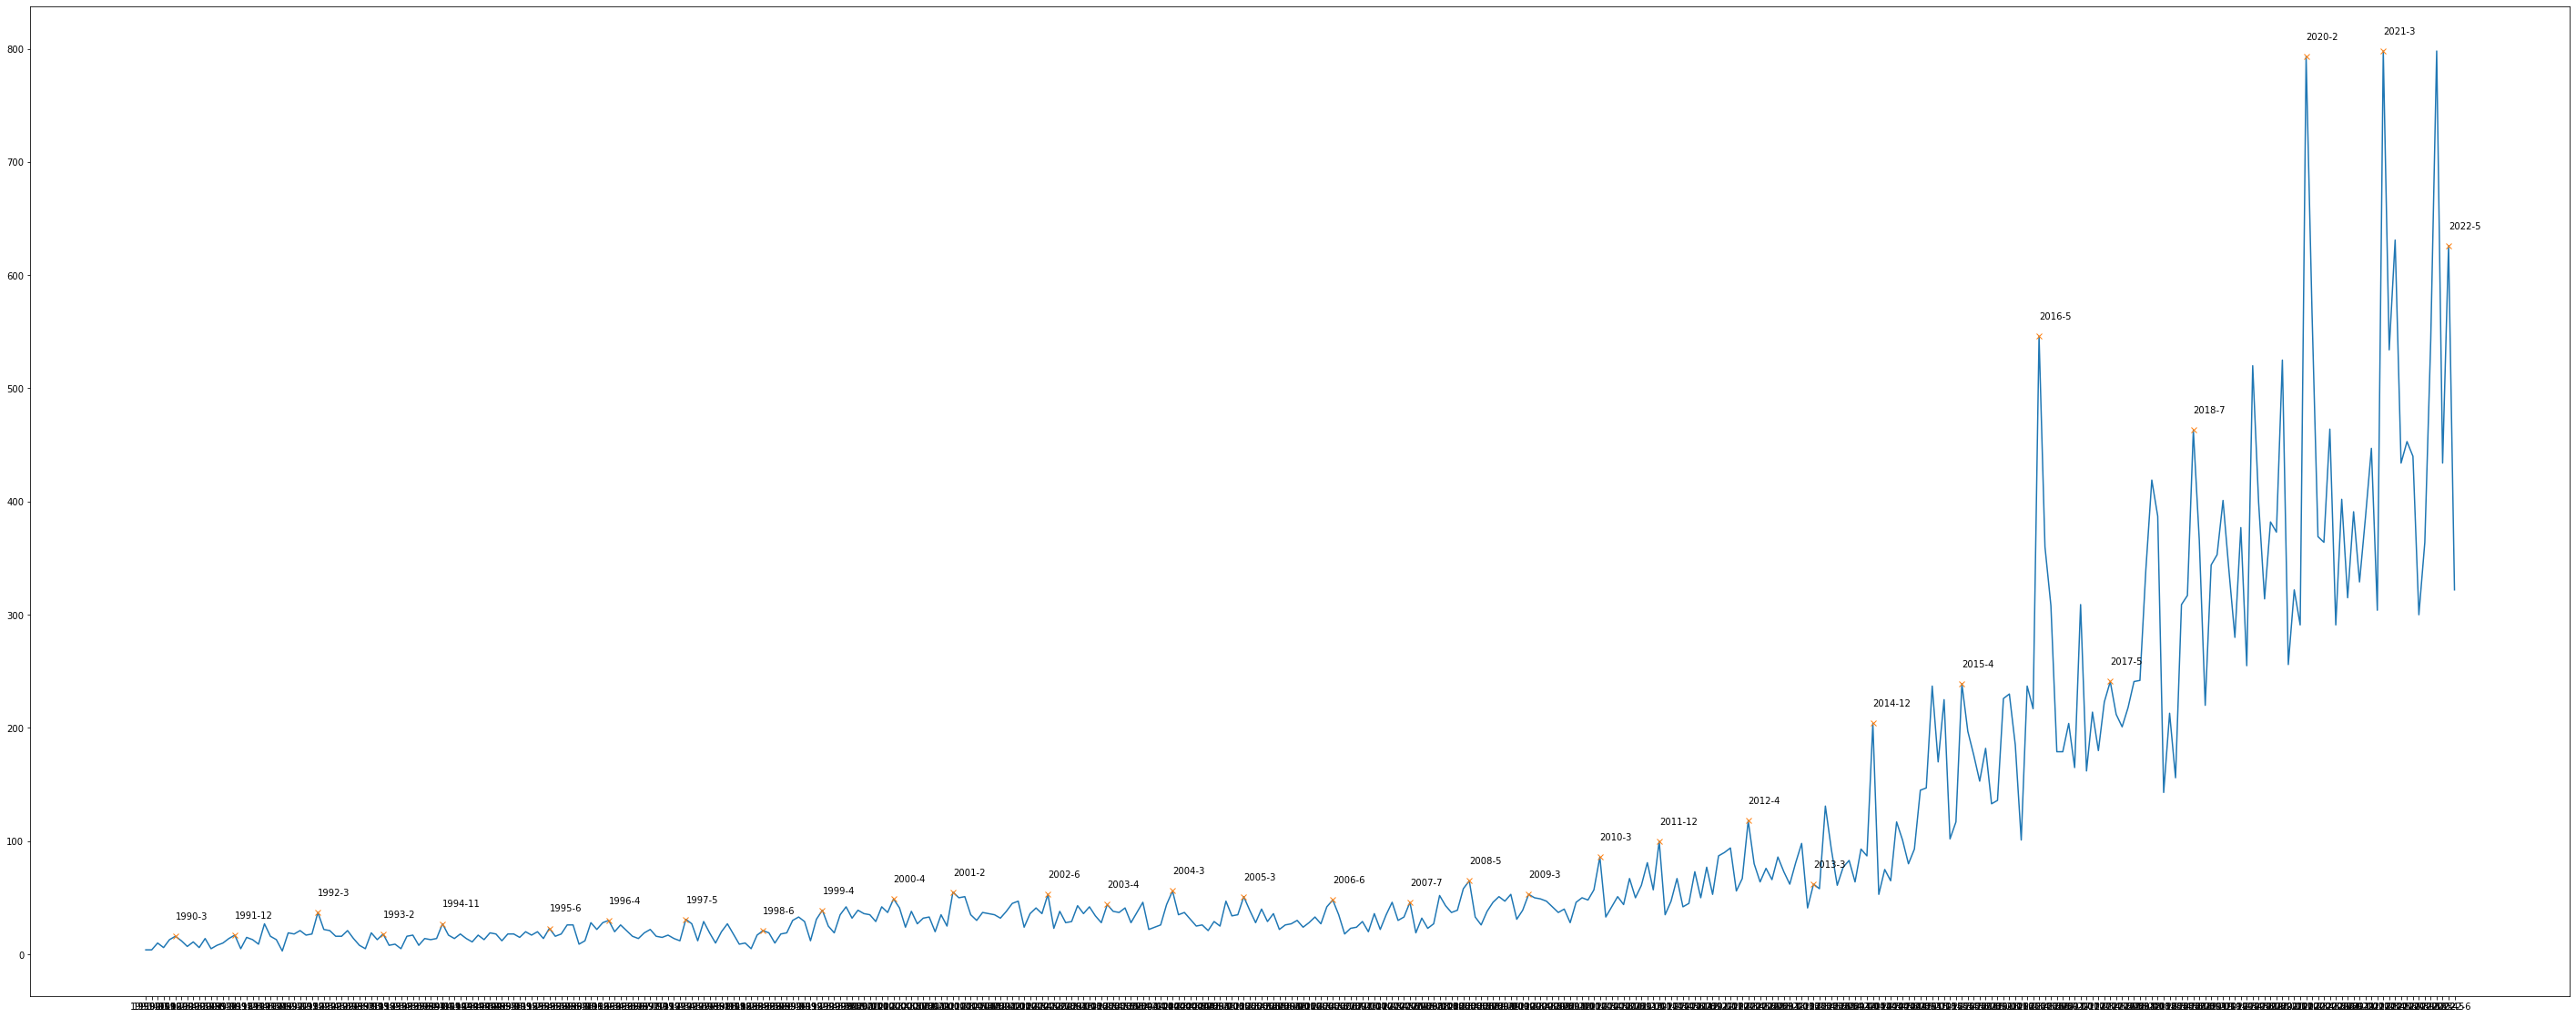

In [234]:
plt.figure(figsize = (50, 20))
plt.plot(df_ym)
plt.plot(peaks, df_ym[peaks], 'x')
#plt.annotate(df_ym.index[peaks], xy = (peaks, df_ym[peaks] + 50))
for idx, label in enumerate(df_ym.index[peaks]):
    plt.annotate(label, (peaks[idx], df_ym[peaks[idx]]+15))

In [235]:
df_peaks = pd.DataFrame()
for i in df_ym[peaks].index:
    df_peaks = pd.concat([df_peaks, df[df['ym'] == i]])

In [236]:
df_peaks.columns

Index(['뉴스 식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드',
       '특성추출(가중치순 상위 50개)', '본문', 'URL', '분석제외 여부', 'year', 'month', 'day',
       'YM', 'ym'],
      dtype='object')

In [239]:
df_peaks.groupby('언론사').count()

,뉴스 식별자,일자,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,...,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부,year,month,day,YM,ym
언론사,,,,,,,,,,,,,,,,,,,,,
KBS,137,137,135,137,137,116,98,48,17,8,...,137,137,137,137,23,137,137,137,0,137
MBC,157,157,106,157,157,126,84,60,18,9,...,157,157,157,156,28,157,157,157,0,157
SBS,113,113,88,113,113,89,71,51,19,8,...,113,113,113,113,3,113,113,113,0,113
YTN,537,537,515,537,537,427,324,259,101,45,...,537,537,537,537,39,537,537,537,0,537
국민일보,543,543,480,543,543,430,306,248,107,41,...,543,543,543,492,12,543,543,543,0,543
동아일보,375,375,300,375,375,315,246,128,55,17,...,375,375,375,331,2,375,375,375,0,375
매일경제,635,635,413,635,635,447,295,247,97,45,...,635,635,635,569,19,635,635,635,0,635
조선일보,262,262,251,262,262,214,160,99,35,16,...,262,262,262,262,2,262,262,262,0,262
중앙일보,588,588,434,588,588,479,325,239,104,39,...,588,588,588,588,8,588,588,588,0,588


In [193]:
df_peaks['특'].tail()

86130    2022년,유권자들,유권자,dream,루서,목사,마틴,루서,연설,흑인,백인,미국,사...
86131    살인,퍼즐,영웅,인간,영화,조커,기억,고담,광대,아서,플렉,조커,당위성,묘사,영화,...
86132    김혜수,소년,심판,10위,넷플릭스,글로벌,김혜수,사진,주연,넷플릭스,오리지널,시리즈...
86133    젤렌스키,대통령,대선,과테말라,코미디언,출신,지미,모랄레스,당선,부패,도둑,구호,결...
86134    난장판,대선,반쪽대통령,대선,역대,비호감,여야,상대,후보,가족,흠결,과거사,주력,더...
Name: 키워드, dtype: object

In [230]:
df_peaks['특성추출(가중치순 상위 50개)']

61721    순녀,조기님,바위덩이,만다라,응접실,발버둥,安世洪,안통,韓勝源,잠옷,삼각팬티,잠옷차...
61722    범인들,며칠전,피해자,사람들,충주시,황은경,뉴스시간,치안부재,인간상,인생살이,가정과...
61723    의원들,平民黨,국정감사,與野,民自黨,정치불신,定期會,與黨,國監,安眠島,핵폐기물처리장...
61724    바웬사,마조비예츠키,폴란드,지도자,과학원,티민스키,브눅리핀스키,정치발전,국민들,민주...
61725    한약재,중국,교포들,덕수궁,중국교포들,편자환,1만,서울역,우황청심환,1천,종로,원어...
                               ...                        
86130    대한민국,탄소중립,미국,유권자들,마틴,원자력,루서,억강부약,이대녀,정치인들,이대남,...
86131    배트맨,조커,리들러,브루스,배트카,상속자,웨인,고담시,리브스,호아킨,거짓말,극장가,...
86132    넷플릭스,소년심판,김혜수,10위,태국,한국,스페인,온라인,플릭스,2위,싱가포르,홍콩...
86133    우크라이나,미군,홍정표,아프리카,성범죄,데니스,슈미갈,시민들,모랄레스,과테말라,볼로...
86134    진영,미국,지지율,더불어민주당,트웨인,윤석열,문재인,비호감,한국,유권자,골수,논설위...
Name: 특성추출(가중치순 상위 50개), Length: 12073, dtype: object

In [231]:
df_peaks.to_csv("../result/hate_peak.csv")